In [ ]:
########### PROOF OF ZIPF'S LAW ##########
##########################################



# Zipf's law was originally formulated in terms of quantitative linguistics, stating that 
# given some corpus of natural language utterances, the frequency of any word is inversely 
# proportional to its rank in the frequency table. 
# 
# eg: in a language, the top  most used words are ABC, DEF, GHI, JKL  in that order.
#     Then the word DEF will appear 1/2 times as ABC, GHI will appear 1/3 and JKL
#     will appear 1/4 times as ABC. If a word is the nth most used word in a language then its
#     frequency will be 1/n of the most used word
# 
# 
# Although Zipf's Law holds for all languages, 
# even non-natural ones like Esperanto,[12] the reason is still not well understood. 

# We will be trying to prove Zipfs law at 3 levels:
#
# 1. Independant Books - We will prove that the law holds true for independant English 
#     language books from the Gutenberg Corpus
# 
# 2. Genres - We will prove that the law holds true for different genres of English language 
#     books from the Brown Corpus
# 
# 3. Languages - We will prove that the law holds true for different languages from the UDHR Corpus




import nltk
nltk.download('stopwords')
nltk.download('brown')
nltk.download('gutenberg')
nltk.download('udhr')

In [144]:
# Imports
from nltk.corpus import brown
from nltk.corpus import gutenberg
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']= 16,7

In [142]:


def filterWords(words):
    all_stopwords=["``","''"]
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word.isnumeric()]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in all_stopwords]
    return words

def plotWords(words,category):

    fdist = nltk.FreqDist(words)
    freqs=[]
    w=[]
    normalize_to=1000
    maxFrequency=0;
    for word, frequency in fdist.most_common(50):
        freqs.append(frequency)
        w.append(word)
        if(maxFrequency < frequency):
            maxFrequency = frequency
    
    normIndex = 1000/maxFrequency
    normalizedFreq = []
    for j in freqs:
        normalizedFreq.append(j*normIndex)
        

    
    plt.plot(normalizedFreq, ms=4, label=category,) 


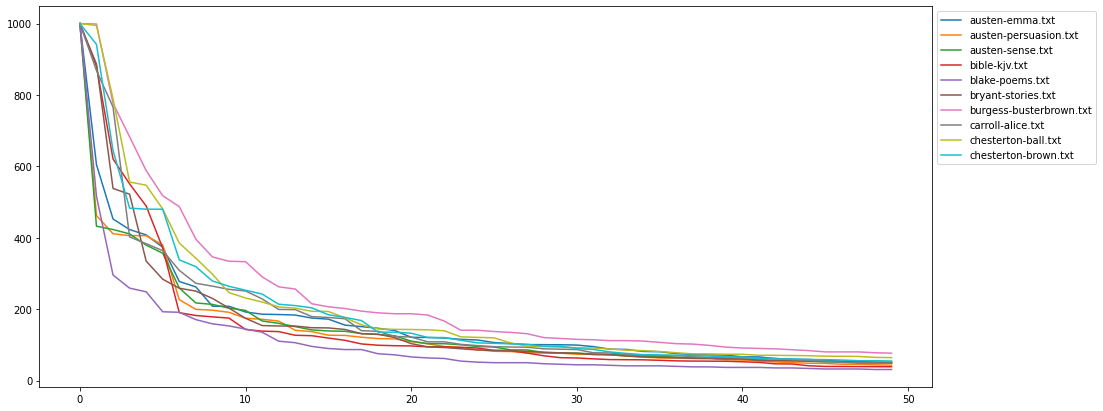

In [150]:
# 1. Independant Books - We will prove that the law holds true for 10 independant English 
#     language books from the Gutenberg Corpus

from nltk.corpus import gutenberg
fileids=gutenberg.fileids()[0:10]
for i in fileids:
    plotWords(gutenberg.words(i),i)
plt.legend(loc = "upper left",bbox_to_anchor=(1,1))
plt.show()  

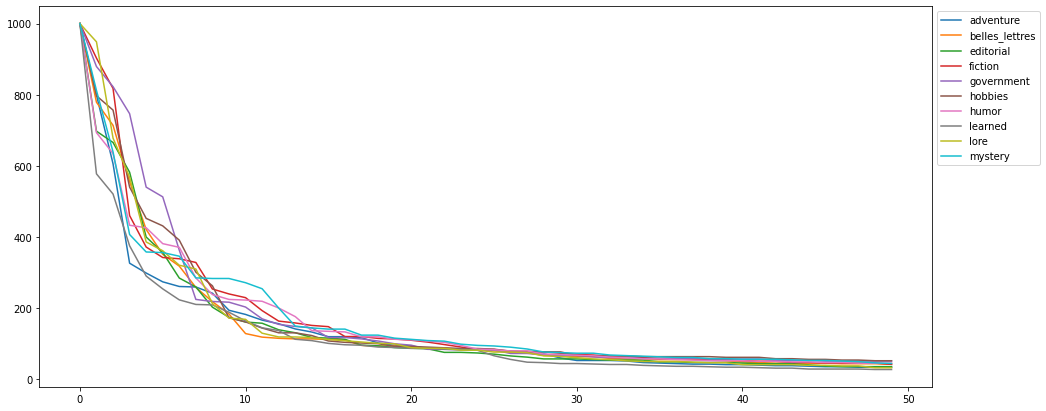

In [151]:
# 2. Genres - We will prove that the law holds true for different genres of English language 
#     books from the Brown Corpus

for j in brown.categories()[0:10]:
    words = brown.words(categories=j)[0:10000]
    plotWords(words, j)
plt.legend(loc = "upper left",bbox_to_anchor=(1,1))
plt.show()    

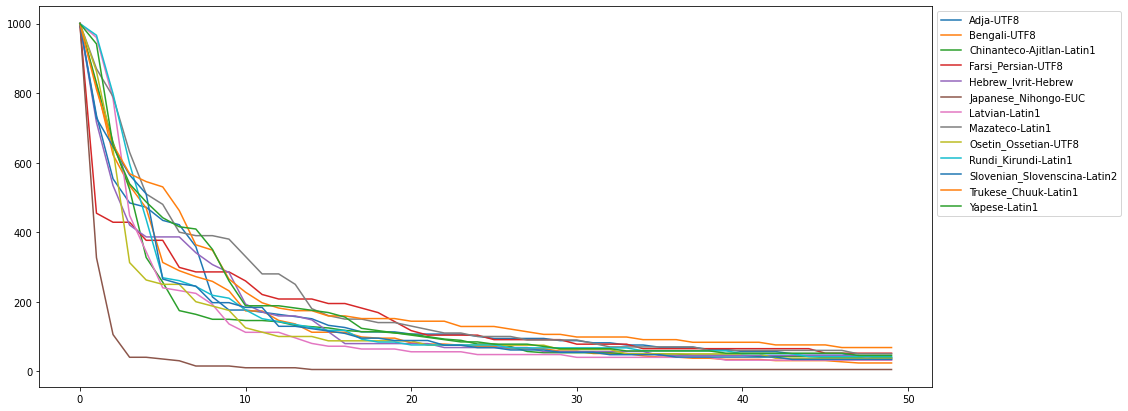

In [147]:
from nltk.corpus import udhr
fileids=udhr.fileids()[4:500:25]


for lang in fileids:
    plotWords(udhr.words(lang),lang)
plt.legend(loc = "upper left",bbox_to_anchor=(1,1))
plt.show()